In [1]:
from ginkgo.data.ginkgo_data import GDATA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from tqdm.notebook import tqdm

In [2]:
stock_list = GDATA.get_stock_info_df()
# stock_list = stock_list[:10]
print(stock_list.head(5))

                               uuid  \
3  585e49bf85c341b99f8b5347a2746f77   
4  8a826138ddeb47f093c28dfc4758c2e3   
5  567ee5d980674581b940dcd4d6ed6cf9   
6  f1d1c55879ed4858a8eb9435502e7a67   
7  5b200e8b6e624949922957cb601b4f22   

                                           desc           timestamp  \
3  This man is so lazy. There is no description 2023-11-02 00:56:51   
4  This man is so lazy. There is no description 2023-11-02 00:56:51   
5  This man is so lazy. There is no description 2023-11-02 00:56:51   
6  This man is so lazy. There is no description 2023-11-02 00:56:51   
7  This man is so lazy. There is no description 2023-11-02 00:56:51   

               create              update  isdel                source  \
3 2023-11-02 00:56:51 2023-11-02 00:56:51  false  SOURCE_TYPES.TUSHARE   
4 2023-11-02 00:56:51 2023-11-02 00:56:51  false  SOURCE_TYPES.TUSHARE   
5 2023-11-02 00:56:51 2023-11-02 00:56:51  false  SOURCE_TYPES.TUSHARE   
6 2023-11-02 00:56:51 2023-11-02 00:56:51 

In [3]:
N = 1

In [4]:
df_result = pd.DataFrame()
with tqdm(total=len(stock_list), desc=f"Processing Data") as pbar:
    for i ,r in stock_list.iterrows():
        pbar.set_description(f"Processing code: {r.code}")
        start = f"2021-01-01"
        end = f"2022-01-01"
        df = GDATA.get_daybar_df(code=r.code,date_start=start,date_end=end)
        df[f'未来{N}天涨跌幅'] = (df['close'].shift(-N) - df['close']) / df['close']
        df['小数首位'] = df['close'].apply(lambda x: int(str(x).split('.')[1][0]))
        df_result = pd.concat([df_result, df], ignore_index=True)
        pbar.update(1)
df_result.drop(columns=['uuid','desc','timestamp','create','update','isdel','source','frequency'],inplace=True)
print(df_result)

Processing Data:   0%|          | 0/5380 [00:00<?, ?it/s]

              code   open   high    low  close   volume   未来1天涨跌幅 小数首位
0        000001.SZ  19.10  19.10  18.44  18.60  1554216 -0.023118    6
1        000001.SZ  18.40  18.48  17.80  18.17  1821352  0.076500    1
2        000001.SZ  18.08  19.56  18.00  19.56  1934945  0.017382    5
3        000001.SZ  19.52  19.98  19.23  19.90  1584185 -0.002513    9
4        000001.SZ  19.90  20.10  19.31  19.85  1195473  0.026700    8
...            ...    ...    ...    ...    ...      ...       ...  ...
1039787  872925.BJ  21.21  21.21  20.86  20.99     1831  0.026203    9
1039788  872925.BJ  21.00  21.59  20.74  21.54     1635  0.053853    5
1039789  872925.BJ  21.65  22.80  21.50  22.70     4360  0.171366    7
1039790  872925.BJ  22.31  27.46  22.31  26.59    21289 -0.048138    5
1039791  872925.BJ  26.33  26.94  24.00  25.31    14701       NaN    3

[1039792 rows x 8 columns]


In [5]:
df = df_result.copy()
df.dropna(inplace=True)
print(df)

              code   open   high    low  close   volume   未来1天涨跌幅 小数首位
0        000001.SZ  19.10  19.10  18.44  18.60  1554216 -0.023118    6
1        000001.SZ  18.40  18.48  17.80  18.17  1821352  0.076500    1
2        000001.SZ  18.08  19.56  18.00  19.56  1934945  0.017382    5
3        000001.SZ  19.52  19.98  19.23  19.90  1584185 -0.002513    9
4        000001.SZ  19.90  20.10  19.31  19.85  1195473  0.026700    8
...            ...    ...    ...    ...    ...      ...       ...  ...
1039786  872925.BJ  21.75  21.81  20.83  20.97     2431  0.000954    9
1039787  872925.BJ  21.21  21.21  20.86  20.99     1831  0.026203    9
1039788  872925.BJ  21.00  21.59  20.74  21.54     1635  0.053853    5
1039789  872925.BJ  21.65  22.80  21.50  22.70     4360  0.171366    7
1039790  872925.BJ  22.31  27.46  22.31  26.59    21289 -0.048138    5

[1035199 rows x 8 columns]


/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28072 (\N{CJK UNIFIED IDEOGRAPH-6DA8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: Us

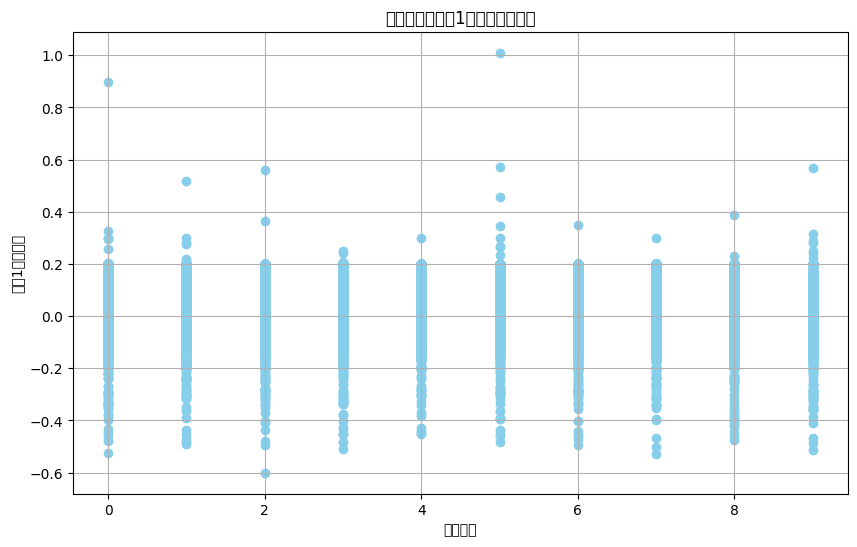

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['小数首位'], df[f'未来{N}天涨跌幅'], color='skyblue')
plt.xlabel('小数首位')
plt.ylabel(f'未来{N}天涨跌幅')
plt.title(f'小数首位与未来{N}天涨跌幅的关系')
plt.grid(True)
plt.show(block=False)

In [7]:
grouped_desc = df.groupby('小数首位')['未来1天涨跌幅'].describe()
print(grouped_desc)

         count      mean       std       min       25%  50%       75%  \
小数首位                                                                    
0     114716.0  0.000751  0.032331 -0.524148 -0.014987  0.0  0.013333   
1     108772.0  0.000755  0.031179 -0.489957 -0.014504  0.0  0.012924   
2     104882.0  0.000983  0.031573 -0.600467 -0.014604  0.0  0.013393   
3     102156.0  0.001019  0.032007 -0.511380 -0.015027  0.0  0.013761   
4      97479.0  0.001093  0.031507 -0.451132 -0.015311  0.0  0.014130   
5      97863.0  0.000733  0.032094 -0.483022 -0.015936  0.0  0.014250   
6      98789.0  0.000727  0.031613 -0.494393 -0.015428  0.0  0.013873   
7     100199.0  0.000829  0.031512 -0.529227 -0.014961  0.0  0.013808   
8     105235.0  0.000772  0.031743 -0.473518 -0.015358  0.0  0.013749   
9     105108.0  0.000447  0.031573 -0.513903 -0.015228  0.0  0.013468   

           max  
小数首位            
0     0.895833  
1     0.519048  
2     0.559934  
3     0.249715  
4     0.299517  
5   

/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28072 (\N{CJK UNIFIED IDEOGRAPH-6DA8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kaoru/Applications/Ginkgo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: Us

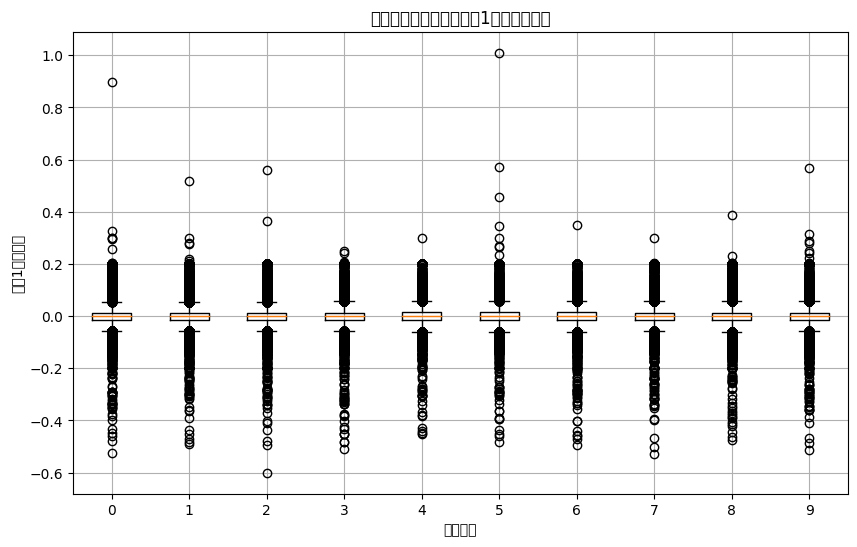

In [8]:
# 按小数首位值分组计算涨跌幅数据
grouped = df.groupby('小数首位')['未来1天涨跌幅'].apply(list)

# 准备绘制盒图的数据
data_to_plot = [grouped[key] for key in sorted(grouped.keys())]

# 创建盒图
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=sorted(grouped.keys()))
plt.title('不同小数首位对应的未来1天涨跌幅分布')
plt.xlabel('小数首位')
plt.ylabel('未来1天涨跌幅')
plt.grid(True)
plt.show(block=False)

/tmp/ipykernel_43685/682962564.py:49: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_43685/682962564.py:49: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_43685/682962564.py:49: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_43685/682962564.py:49: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_43685/682962564.py:49: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_43685/682962564.py:49: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_43685/682962564.py:49: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_l

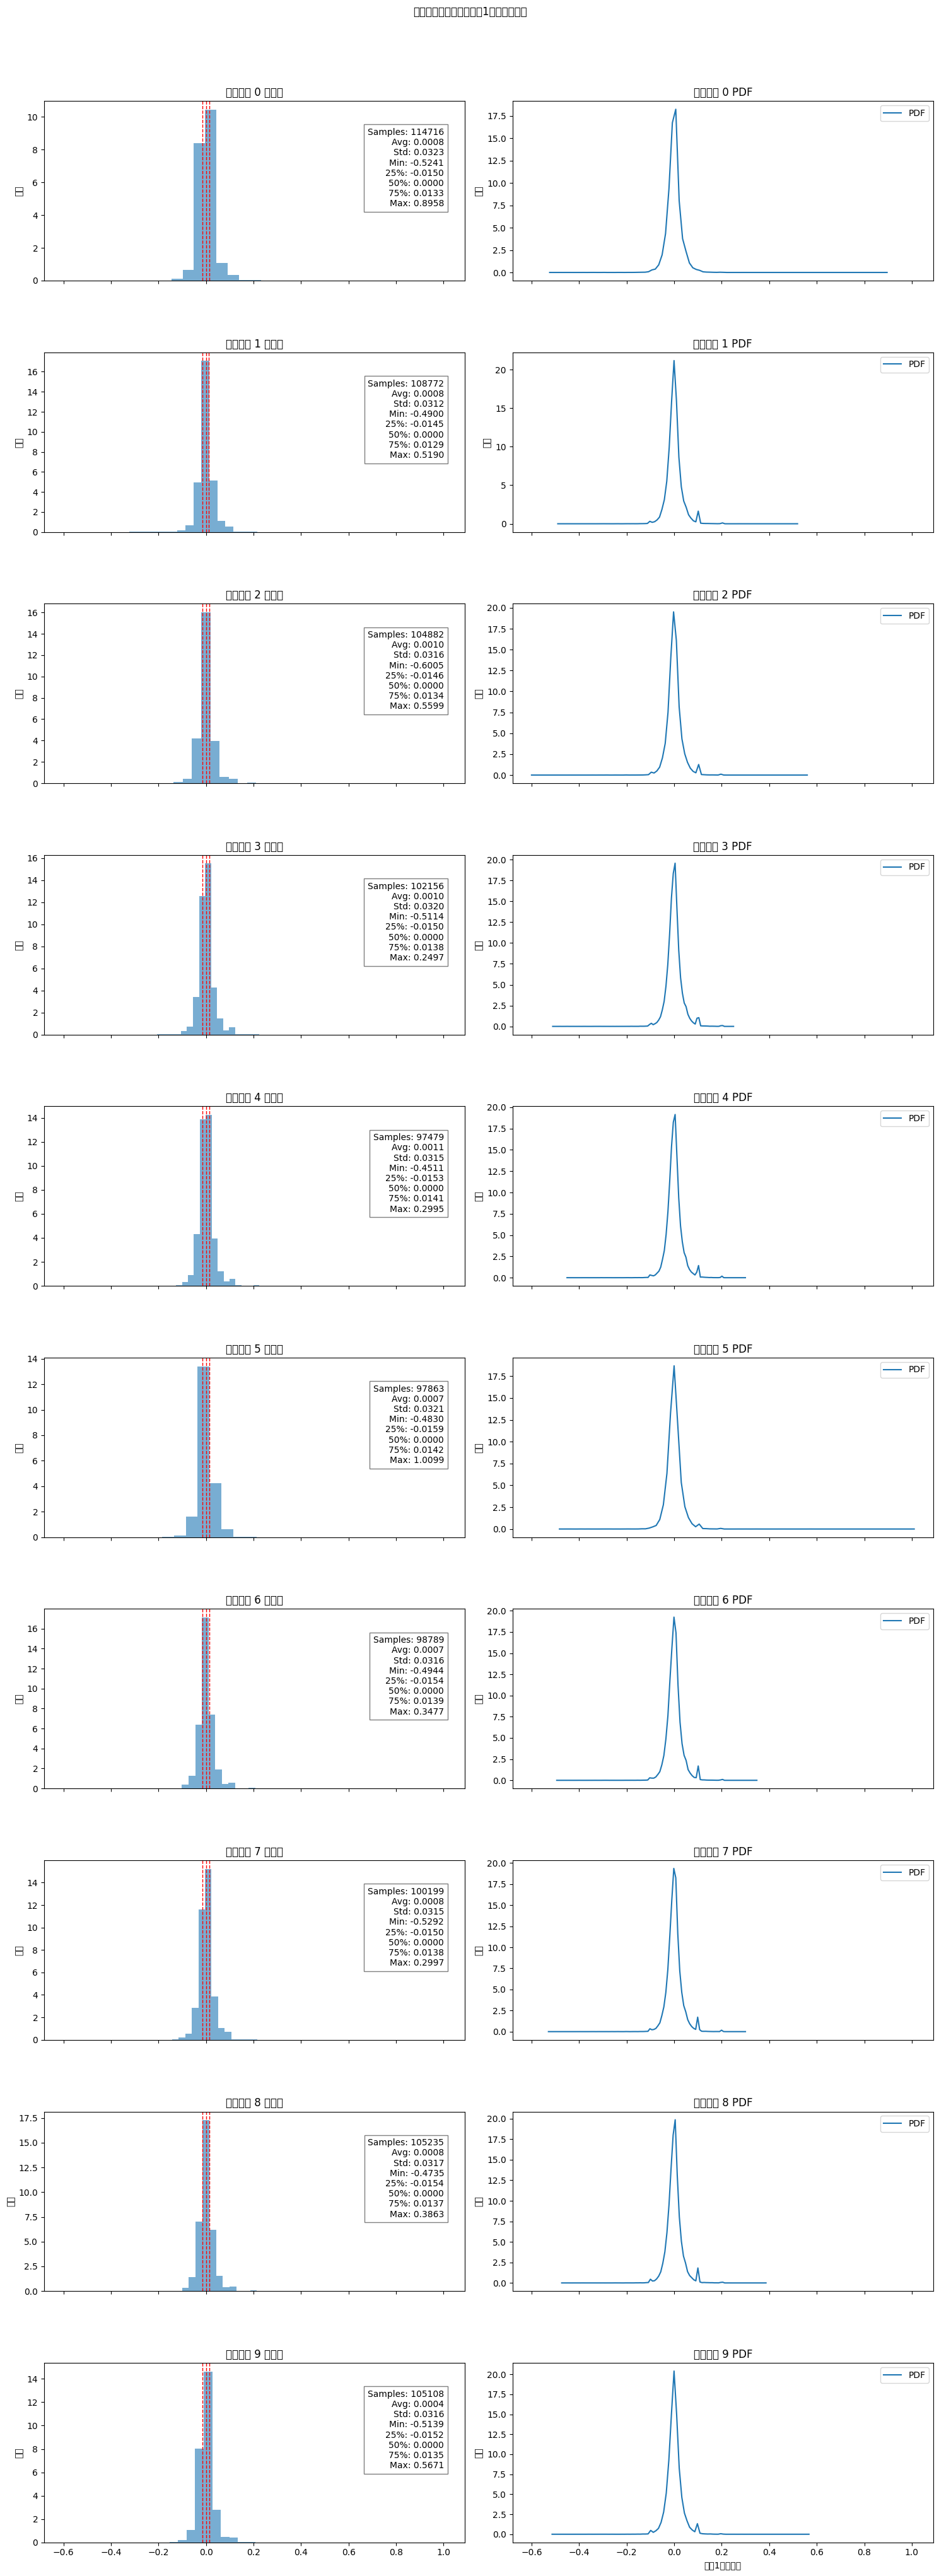

In [9]:
from scipy.stats import gaussian_kde
# 按小数首位值分组计算涨跌幅数据
grouped = df.groupby('小数首位')[f'未来{N}天涨跌幅'].apply(list)

# 准备绘制图形
fig, axs = plt.subplots(len(grouped), 2, figsize=(15, len(grouped) * 4), sharex='col')

# 绘制每个小数首位值的密度图和PDF
for i, key in enumerate(sorted(grouped.keys())):
    # 密度图
    data = np.asarray(grouped[key])
    axs[i, 0].hist(data, bins=30, density=True, alpha=0.6)
    axs[i, 0].set_title(f'小数首位 {key} 密度图')
    axs[i, 0].set_ylabel('密度')
    
    # 添加25%、50%和75%分位数的水平线
    quartiles = np.percentile(data, [25, 50, 75])
    for quartile in quartiles:
        axs[i, 0].axvline(x=quartile, color='r', linestyle='--', linewidth=1)
    
    # PDF
    density = gaussian_kde(data)
    x_vals = np.linspace(min(data), max(data), 100)
    axs[i, 1].plot(x_vals, density(x_vals), label='PDF')
    axs[i, 1].set_title(f'小数首位 {key} PDF')
    axs[i, 1].set_ylabel('密度')
    axs[i, 1].legend()
    
    # 添加统计信息
    stats_text = (
        f"Samples: {len(data)}\n"
        f"Avg: {np.mean(data):.4f}\n"
        f"Std: {np.std(data):.4f}\n"
        f"Min: {np.min(data):.4f}\n"
        f"25%: {np.percentile(data, 25):.4f}\n"
        f"50%: {np.median(data):.4f}\n"
        f"75%: {np.percentile(data, 75):.4f}\n"
        f"Max: {np.max(data):.4f}"
    )
    axs[i, 0].text(0.95, 0.85, stats_text, transform=axs[i, 0].transAxes,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(facecolor='white', alpha=0.5))

# 设置公共的x轴标签和整体标题
plt.xlabel('未来1天涨跌幅')
fig.suptitle('不同小数首位对应的未来1天涨跌幅分布', y=1.02)

# 调整子图之间的间距和布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

plt.show()

In [10]:
from scipy.stats import pearsonr
decimal_digit = df['小数首位']
price_change = df[f'未来{N}天涨跌幅']
correlation_coefficient, p_value = pearsonr(decimal_digit, price_change)
print(f"皮尔逊相关系数：{correlation_coefficient:.4f}")
print(f"显著性检验 p 值：{p_value:.4f}")
# 进行显著性检验
alpha = 0.05  # 设置显著性水平为 0.05

# if p_value < alpha:
#     print("相关系数显著，存在统计显著性")
# else:
#     print("相关系数不显著，不存在统计显著性")

皮尔逊相关系数：-0.0025
显著性检验 p 值：0.0120
